In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
px.scatter(df,x='Glucose',y='Insulin',color='Outcome',symbol='Outcome')

<AxesSubplot:>

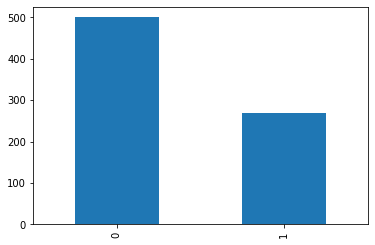

In [4]:
df.Outcome.value_counts().plot(kind='bar')

In [5]:
X = df[['Glucose','Insulin']]
y = df['Outcome']
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y,test_size=.2,)
xtrain.shape,xtest.shape

((614, 2), (154, 2))

In [6]:
m = KNeighborsClassifier(n_neighbors=10)
m.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=10)

In [7]:
m.score(xtest,ytest) 

0.7402597402597403

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [9]:
ypred = m.predict(xtest)

In [10]:
import seaborn as sns

In [11]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[91 14]
 [26 23]]


In [12]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       105
           1       0.62      0.47      0.53        49

    accuracy                           0.74       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.73      0.74      0.73       154



In [13]:
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


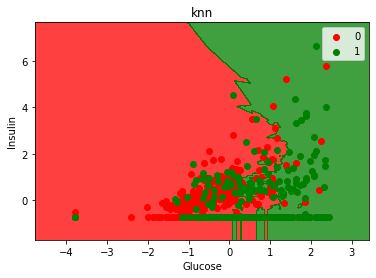

In [14]:
from utils import plot_area_distribution
plot_area_distribution(m,xtrain,ytrain,"knn",'Glucose','Insulin')

In [ ]:
params = {
    'n_estimators' : list(range(100,501,100)),
    'criterion': ["squared_error", "absolute_error", "poisson"],
    'max_depth': list(range(5,51,15)),
}
params

In [ ]:
grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv=3,n_jobs=-1,verbose=3)

In [32]:
grid.fit(X,y)

In [ ]:
gf = pd.DataFrame(grid.cv_results_)

In [ ]:
gf.sort_values(by='Outcome')
gf

In [ ]:
grid.best_estimator_

In [ ]:
from joblib import dump

In [ ]:
dump(grid.best_estimator_,"diabetics_model.pkl")